# 📊 Choosing the Right Clustering Algorithm: K-Means vs Hierarchical vs DBSCAN

Clustering is not **one-size-fits-all**.  
Different algorithms work better depending on **data shape, noise, and prior knowledge**.

---

## 🔹 1. K-Means Clustering
**When to use:**
- Data has **spherical/round clusters**.
- You **know the number of clusters (k)** in advance.
- Data is **large-scale** (fast and efficient).

**Real-world examples:**
- Customer segmentation (e.g., dividing customers into 5 groups for marketing).
- Grouping similar products based on features.
- Image compression (clustering pixel colors).

**Drawbacks:**
- Struggles with **non-spherical clusters**.
- Sensitive to **outliers** (a single outlier can drag centroids).
- Must specify **k in advance**.

---

## 🔹 2. Agglomerative (Hierarchical) Clustering
**When to use:**
- Data is **small to medium size** (computationally expensive for big data).
- You want a **hierarchy/tree of clusters** (dendrogram).
- You don’t know the number of clusters in advance (can cut the tree later).

**Real-world examples:**
- Document/topic clustering (to see sub-topics under main topics).
- Gene expression data in biology (hierarchical relationships).
- Social network analysis (sub-communities).

**Drawbacks:**
- Not scalable to **very large datasets**.
- Sensitive to noise and outliers.
- Once merged/split, clusters **cannot be undone**.

---

## 🔹 3. DBSCAN (Density-Based Spatial Clustering)
**When to use:**
- Data has **irregular shapes** (not spherical).
- You don’t know the number of clusters.
- You expect **noise/outliers** and want them detected.
- Works well if clusters are of **different sizes and densities** (to some extent).

**Real-world examples:**
- GPS/Geolocation data → finding hotspots (e.g., restaurants, crime areas).
- Anomaly detection in banking transactions.
- Identifying communities in spatial or IoT sensor data.

**Drawbacks:**
- Needs careful tuning of `eps` and `min_samples`.
- Struggles with **varying densities**.
- Not ideal for **very high-dimensional data** (distance metrics lose meaning).

---

## ⚖️ Quick Comparison Table

| Algorithm     | Best for | Needs k? | Handles Noise? | Cluster Shape | Scalability |
|---------------|----------|----------|----------------|---------------|-------------|
| **K-Means**   | Large, spherical clusters | ✅ Yes | ❌ No | Round | ⭐⭐⭐⭐⭐ (fast) |
| **Hierarchical** | Small/medium datasets, hierarchy | ❌ No | ❌ No | Any (but sensitive) | ⭐⭐ |
| **DBSCAN**    | Arbitrary shapes, outliers | ❌ No | ✅ Yes | Any (density-based) | ⭐⭐⭐ |

---

## ✅ Summary
- Use **K-Means** if clusters are round, you know `k`, and dataset is large.  
- Use **Hierarchical** if dataset is smaller, and you want a **hierarchy/dendrogram**.  
- Use **DBSCAN** if clusters are **irregular shapes**, you don’t know `k`, and you want to detect **noise/outliers**.  



**Dataset URL:** https://drive.google.com/file/d/16iPWhPDRhW9m5f71QJX2cHJmsaB2hX3v/view?usp=sharing

**Density Based Spatial Clustering of Application with Noise (DBSCAN)**

**DBSCAN is a density-based clustering algorithm that groups together points that are closely packed while marking points that are far away as ***outliers*****

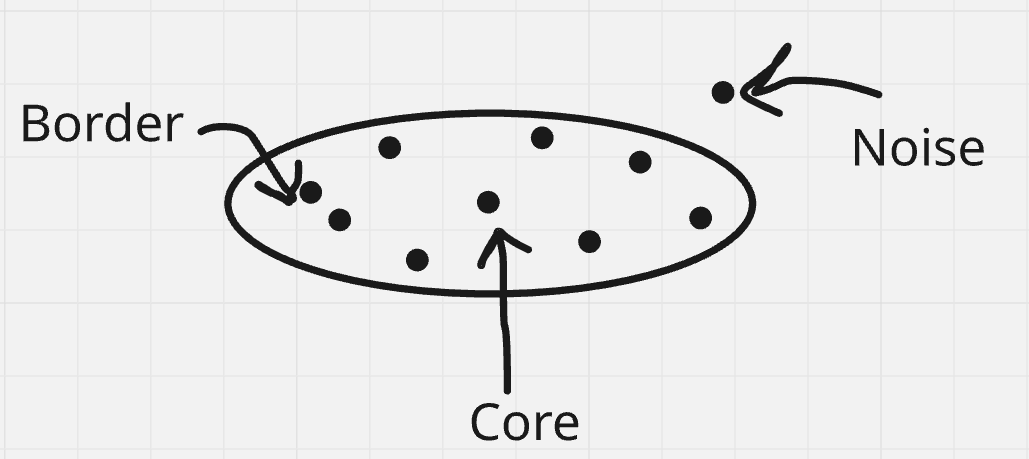

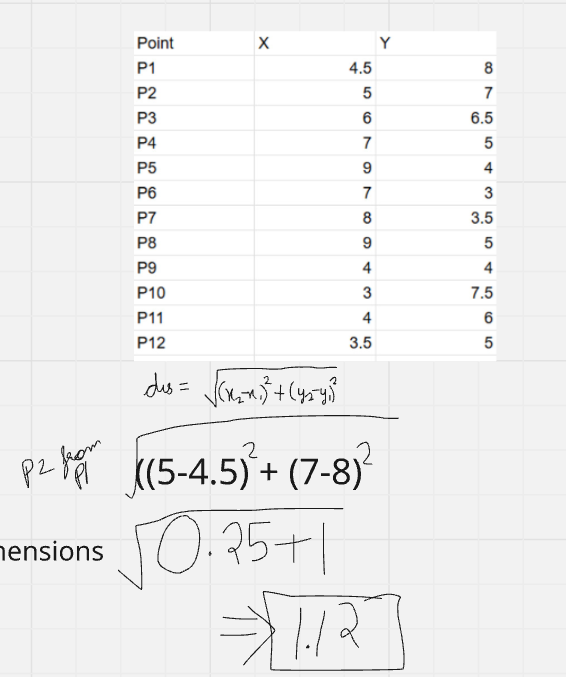

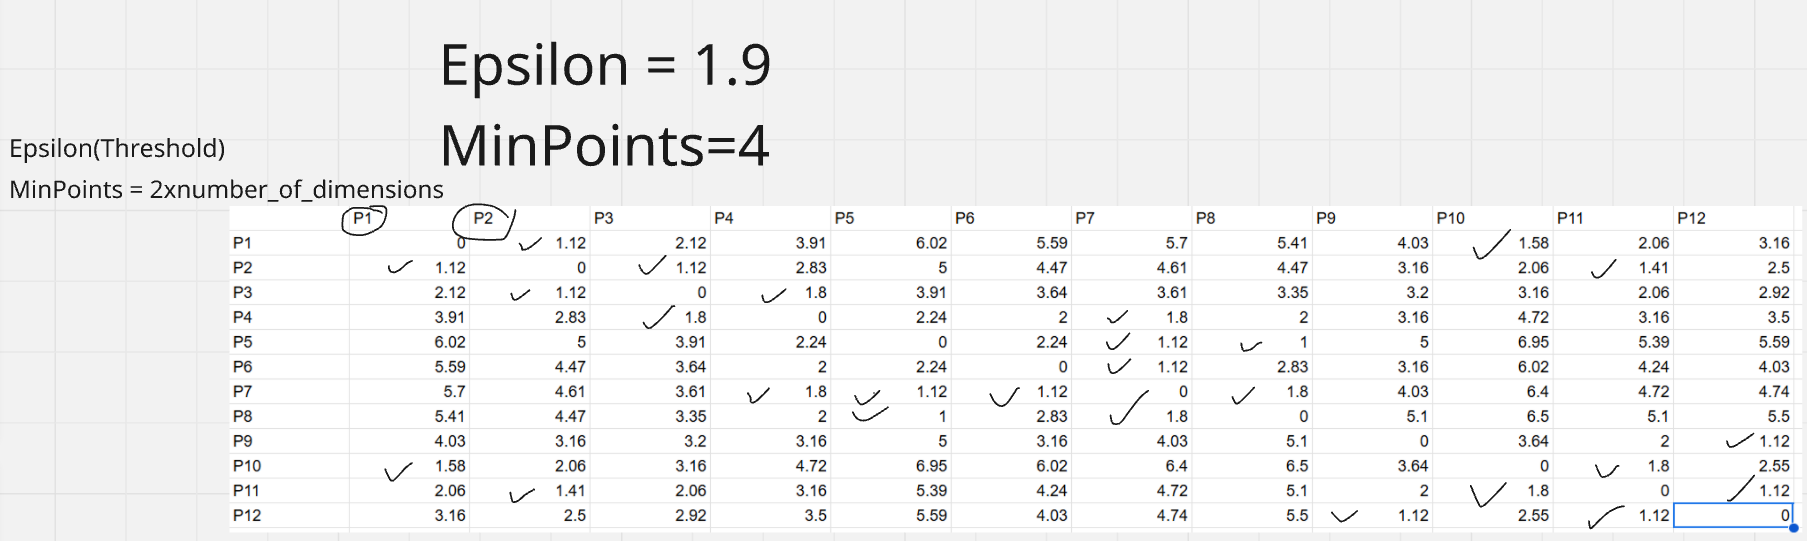

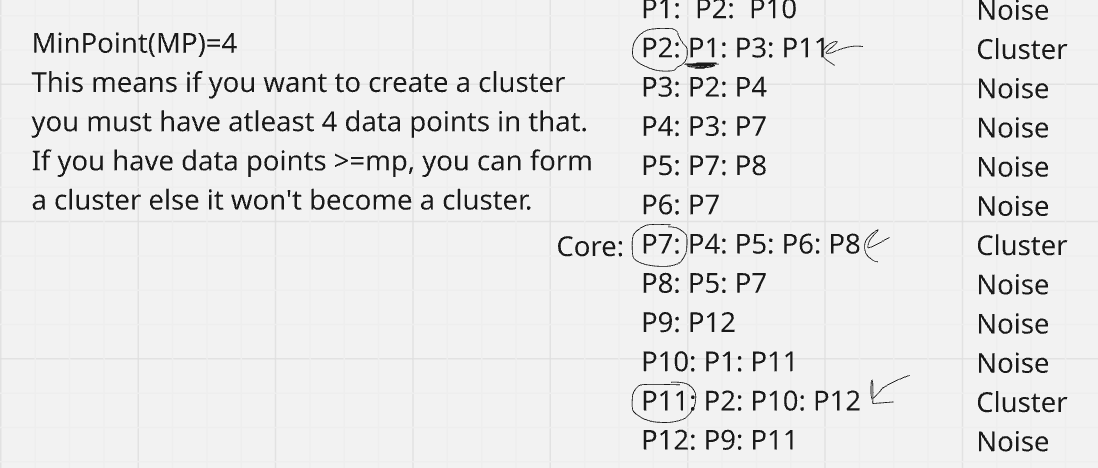

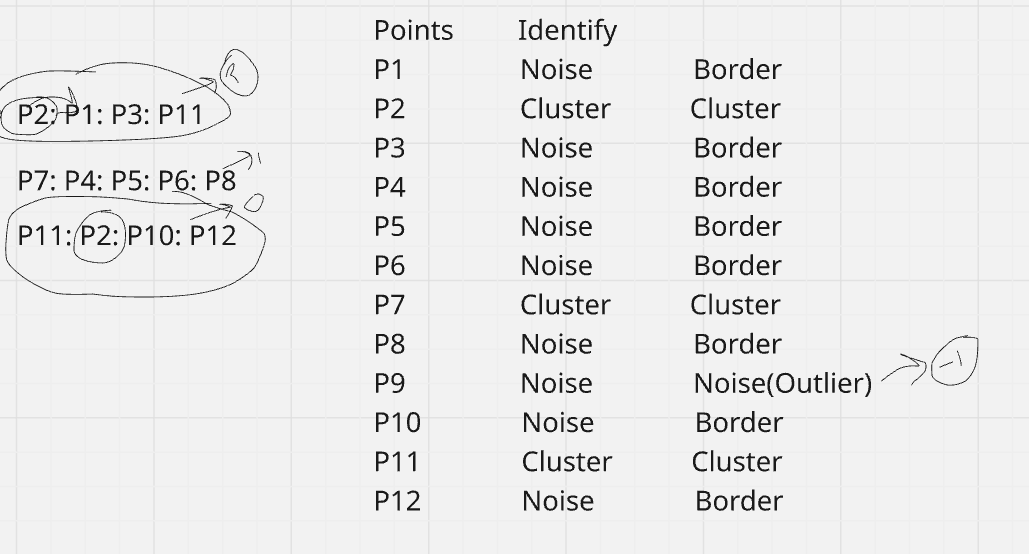

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# Channel: Hotel, Restaurant, Cafe or Retail
# Region:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

**Create a scatter plot showing the relation between Milk and Grocery spending, colored by Channel Column**

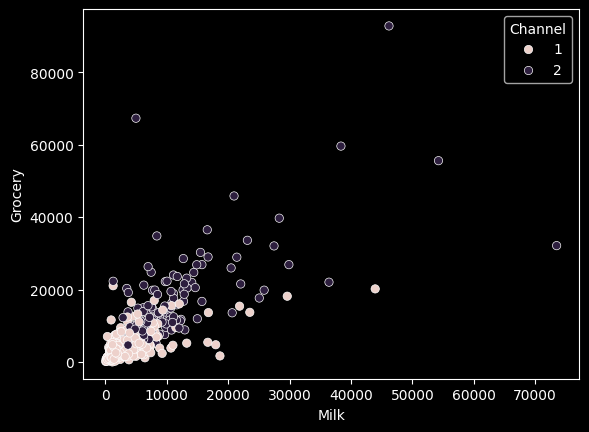

In [ ]:
plt.style.use("dark_background")
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_scaled = sc.fit_transform(df)

In [ ]:
x_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# min_samples starting point: 2* number of dimensions
min_points = 16

In [ ]:
# Small Epsilon value: Too much noise
# Large Epsilon value: Circles will overlap

array([ 10.        ,  14.73684211,  19.47368421,  24.21052632,
        28.94736842,  33.68421053,  38.42105263,  43.15789474,
        47.89473684,  52.63157895,  57.36842105,  62.10526316,
        66.84210526,  71.57894737,  76.31578947,  81.05263158,
        85.78947368,  90.52631579,  95.26315789, 100.        ])

In [ ]:
arr = np.linspace(50,100,5)
print(arr) # Generate data points with equal space

[ 50.   62.5  75.   87.5 100. ]


In [ ]:
for x in np.linspace(0.001, 3, 50):
    print(x)

0.001
0.06220408163265306
0.12340816326530613
0.1846122448979592
0.24581632653061225
0.3070204081632653
0.3682244897959184
0.42942857142857144
0.4906326530612245
0.5518367346938776
0.6130408163265306
0.6742448979591836
0.7354489795918367
0.7966530612244899
0.8578571428571429
0.9190612244897959
0.980265306122449
1.041469387755102
1.1026734693877551
1.163877551020408
1.2250816326530611
1.2862857142857143
1.3474897959183672
1.4086938775510203
1.4698979591836734
1.5311020408163265
1.5923061224489796
1.6535102040816325
1.7147142857142856
1.7759183673469388
1.8371224489795916
1.8983265306122448
1.9595306122448979
2.020734693877551
2.081938775510204
2.1431428571428572
2.2043469387755104
2.265551020408163
2.326755102040816
2.3879591836734693
2.4491632653061224
2.5103673469387755
2.5715714285714286
2.6327755102040817
2.6939795918367344
2.7551836734693875
2.8163877551020406
2.8775918367346938
2.938795918367347
3.0


In [ ]:
df[df['Channel']==2]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...,...,...
418,2,3,660,8494,18622,133,6740,776
421,2,3,17063,4847,9053,1031,3415,1784
423,2,3,17565,3686,4657,1059,1803,668
424,2,3,16980,2884,12232,874,3213,249


In [ ]:
li = []
li.append(np.sum(df['Channel']==2))
li

[np.int64(142)]

In [ ]:
# 1   0
# 2   0
# 3   1



In [ ]:
number_of_outlier = []
percentage_of_outliers = []

for x in np.linspace(0.1, 10, 100):
    dbscan = DBSCAN(eps=x,min_samples=min_points)
    dbscan.fit(x_scaled)

    out_count = np.sum(dbscan.labels_==-1) #Fetching the count of outliers
    number_of_outlier.append(out_count)

    perc_outliers = out_count / len(dbscan.labels_) * 100
    percentage_of_outliers.append(perc_outliers)
    print("For epsilon=",x,"%ofoutliers=",perc_outliers)

For epsilon= 0.1 %ofoutliers= 100.0
For epsilon= 0.2 %ofoutliers= 100.0
For epsilon= 0.30000000000000004 %ofoutliers= 100.0
For epsilon= 0.4 %ofoutliers= 83.4090909090909
For epsilon= 0.5 %ofoutliers= 75.68181818181819
For epsilon= 0.6 %ofoutliers= 71.13636363636363
For epsilon= 0.7000000000000001 %ofoutliers= 62.727272727272734
For epsilon= 0.8 %ofoutliers= 47.5
For epsilon= 0.9 %ofoutliers= 33.86363636363636
For epsilon= 1.0 %ofoutliers= 26.36363636363636
For epsilon= 1.1 %ofoutliers= 22.272727272727273
For epsilon= 1.2000000000000002 %ofoutliers= 20.909090909090907
For epsilon= 1.3000000000000003 %ofoutliers= 19.318181818181817
For epsilon= 1.4000000000000001 %ofoutliers= 15.454545454545453
For epsilon= 1.5000000000000002 %ofoutliers= 13.40909090909091
For epsilon= 1.6 %ofoutliers= 10.681818181818182
For epsilon= 1.7000000000000002 %ofoutliers= 8.409090909090908
For epsilon= 1.8000000000000003 %ofoutliers= 7.727272727272727
For epsilon= 1.9000000000000001 %ofoutliers= 6.590909090909

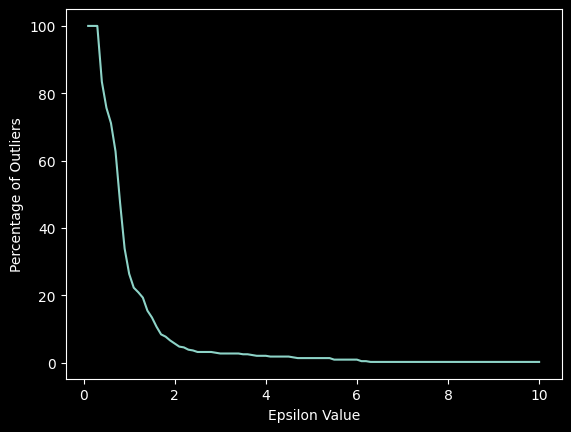

In [ ]:
sns.lineplot(x=np.linspace(0.1,10,100),y=percentage_of_outliers)

plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers')
plt.show()

In [ ]:
# we were selecting all the rows where label = -1 (Outlier)
# percentage ->
# 10 chapters
# 4 chapters
# How much percentage syllabus you have covered?
# 4/10 * 100
# 0.4 * 100
# 40%

In [ ]:
# From this plot we will use epsilon = 2

In [ ]:
# can u clear once that in which cases we would specifically use this algo and not other clustering methods and visa versa?

# in context to this can you clear out where what algos we will use based on data tomorrow?

In [ ]:
dbscan_model = DBSCAN(eps=2,min_samples=16)


In [ ]:
dbscan_model.fit(x_scaled)

DBSCAN(eps=2, min_samples=16)

In [ ]:
df['Labels'] = dbscan_model.labels_

In [ ]:
df[df['Labels']==-1] #Fetching all outliers rows

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
23,2,3,26373,36423,22019,5154,4337,16523,-1
47,2,3,44466,54259,55571,7782,24171,6465,-1
56,2,3,4098,29892,26866,2616,17740,1340,-1
61,2,3,35942,38369,59598,3254,26701,2017,-1
65,2,3,85,20959,45828,36,24231,1423,-1
71,1,3,18291,1266,21042,5373,4173,14472,-1
85,2,3,16117,46197,92780,1026,40827,2944,-1
86,2,3,22925,73498,32114,987,20070,903,-1
87,1,3,43265,5025,8117,6312,1579,14351,-1
92,2,3,9198,27472,32034,3232,18906,5130,-1


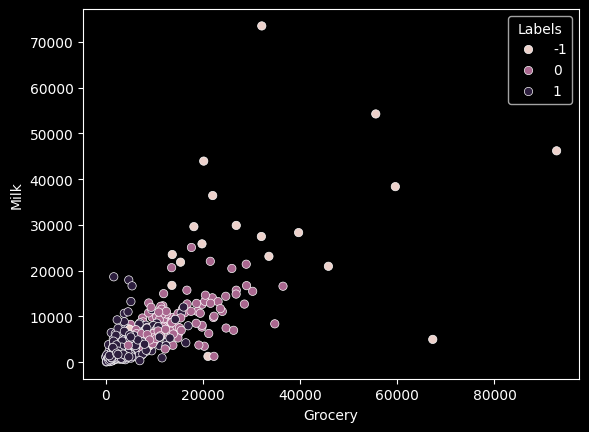

In [ ]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue='Labels')
plt.show()

In [ ]:
import plotly.express as px


In [ ]:
fig = px.scatter_3d(df,x='Fresh',y='Milk',z='Grocery',color='Labels',title='3dScatterPlot')
fig.show()